### __The Sparks Foundation-Graduate Rotational Internship Program__

__Name__: Jasdeep Singh Monga

__Domain__: Data Science and Business Analytics.

__Task 5__: Exploratory Data Analysis - Sports-IPL

__Level__:Advanced

__Purpose__:To find out most successful teams,players and factors contributing to win or loss of a team.

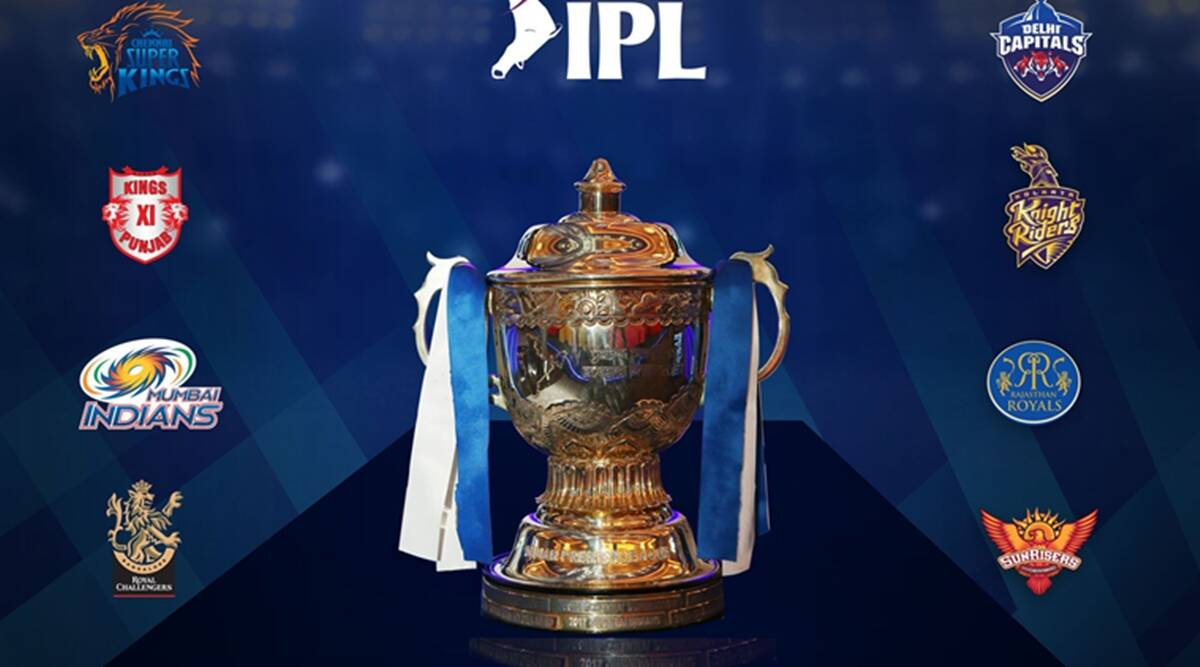

In [1]:
from IPython.display import Image
Image("desktop/ipl-schedule.jpeg",width=550,height=300)

In [2]:
# Importing Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
# Reading the Dataset
data=pd.read_csv("/Users/jasdeepmonga/Library/Containers/com.microsoft.Excel/Data/Downloads/Indian Premier League/matches.csv")
data.head()

id  season       city        date                        team1  \
0   1    2017  Hyderabad  2017-04-05          Sunrisers Hyderabad   
1   2    2017       Pune  2017-04-06               Mumbai Indians   
2   3    2017     Rajkot  2017-04-07                Gujarat Lions   
3   4    2017     Indore  2017-04-08       Rising Pune Supergiant   
4   5    2017  Bangalore  2017-04-08  Royal Challengers Bangalore   

                         team2                  toss_winner toss_decision  \
0  Royal Challengers Bangalore  Royal Challengers Bangalore         field   
1       Rising Pune Supergiant       Rising Pune Supergiant         field   
2        Kolkata Knight Riders        Kolkata Knight Riders         field   
3              Kings XI Punjab              Kings XI Punjab         field   
4             Delhi Daredevils  Royal Challengers Bangalore           bat   

   result  dl_applied                       winner  win_by_runs  \
0  normal           0          Sunrisers Hyderabad           35   
1  normal           0       Rising Pune Supergiant            0   
2  normal           0        Kolkata Knight Riders            0   
3  normal           0              Kings XI Punjab            0   
4  normal           0  Royal Challengers Bangalore           15   

   win_by_wickets player_of_match                                      venue  \
0               0    Yuvraj Singh  Rajiv Gandhi International Stadium, Uppal   
1               7       SPD Smith    Maharashtra Cricket Association Stadium   
2              10         CA Lynn     Saurashtra Cricket Association Stadium   
3               6      GJ Maxwell                     Holkar Cricket Stadium   
4               0       KM Jadhav                      M Chinnaswamy Stadium   

          umpire1        umpire2 umpire3  
0     AY Dandekar       NJ Llong     NaN  
1  A Nand Kishore         S Ravi     NaN  
2     Nitin Menon      CK Nandan     NaN  
3    AK Chaudhary  C Shamshuddin     NaN  
4             NaN            NaN     NaN

In [4]:
# Info about the Dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 756 entries, 0 to 755
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               756 non-null    int64 
 1   season           756 non-null    int64 
 2   city             749 non-null    object
 3   date             756 non-null    object
 4   team1            756 non-null    object
 5   team2            756 non-null    object
 6   toss_winner      756 non-null    object
 7   toss_decision    756 non-null    object
 8   result           756 non-null    object
 9   dl_applied       756 non-null    int64 
 10  winner           752 non-null    object
 11  win_by_runs      756 non-null    int64 
 12  win_by_wickets   756 non-null    int64 
 13  player_of_match  752 non-null    object
 14  venue            756 non-null    object
 15  umpire1          754 non-null    object
 16  umpire2          754 non-null    object
 17  umpire3          119 non-null    ob

In [5]:
#Null Values in each of the Columns
data.isnull().sum()

id                   0
season               0
city                 7
date                 0
team1                0
team2                0
toss_winner          0
toss_decision        0
result               0
dl_applied           0
winner               4
win_by_runs          0
win_by_wickets       0
player_of_match      4
venue                0
umpire1              2
umpire2              2
umpire3            637
dtype: int64

In [6]:
# Percentage of Cities present in the Data set
round(data['city'].value_counts(normalize=True)*100)

Mumbai            13.0
Kolkata           10.0
Delhi             10.0
Bangalore          9.0
Hyderabad          9.0
Chennai            8.0
Jaipur             6.0
Chandigarh         6.0
Pune               5.0
Durban             2.0
Bengaluru          2.0
Visakhapatnam      2.0
Ahmedabad          2.0
Centurion          2.0
Rajkot             1.0
Mohali             1.0
Dharamsala         1.0
Indore             1.0
Johannesburg       1.0
Ranchi             1.0
Port Elizabeth     1.0
Cuttack            1.0
Cape Town          1.0
Abu Dhabi          1.0
Sharjah            1.0
Raipur             1.0
Kochi              1.0
Kanpur             1.0
East London        0.0
Nagpur             0.0
Kimberley          0.0
Bloemfontein       0.0
Name: city, dtype: float64

In [7]:
#Matches where city is Isnull value
data[data['city'].isnull()]

id  season city        date                        team1  \
461  462    2014  NaN  2014-04-19               Mumbai Indians   
462  463    2014  NaN  2014-04-19        Kolkata Knight Riders   
466  467    2014  NaN  2014-04-23          Chennai Super Kings   
468  469    2014  NaN  2014-04-25          Sunrisers Hyderabad   
469  470    2014  NaN  2014-04-25               Mumbai Indians   
474  475    2014  NaN  2014-04-28  Royal Challengers Bangalore   
476  477    2014  NaN  2014-04-30          Sunrisers Hyderabad   

                           team2                  toss_winner toss_decision  \
461  Royal Challengers Bangalore  Royal Challengers Bangalore         field   
462             Delhi Daredevils        Kolkata Knight Riders           bat   
466             Rajasthan Royals             Rajasthan Royals         field   
468             Delhi Daredevils          Sunrisers Hyderabad           bat   
469          Chennai Super Kings               Mumbai Indians           bat   
474              Kings XI Punjab              Kings XI Punjab         field   
476               Mumbai Indians               Mumbai Indians         field   

     result  dl_applied                       winner  win_by_runs  \
461  normal           0  Royal Challengers Bangalore            0   
462  normal           0             Delhi Daredevils            0   
466  normal           0          Chennai Super Kings            7   
468  normal           0          Sunrisers Hyderabad            4   
469  normal           0          Chennai Super Kings            0   
474  normal           0              Kings XI Punjab            0   
476  normal           0          Sunrisers Hyderabad           15   

     win_by_wickets player_of_match                                venue  \
461               7        PA Patel  Dubai International Cricket Stadium   
462               4       JP Duminy  Dubai International Cricket Stadium   
466               0       RA Jadeja  Dubai International Cricket Stadium   
468               0        AJ Finch  Dubai International Cricket Stadium   
469               7       MM Sharma  Dubai International Cricket Stadium   
474               5  Sandeep Sharma  Dubai International Cricket Stadium   
476               0         B Kumar  Dubai International Cricket Stadium   

             umpire1         umpire2 umpire3  
461        Aleem Dar    AK Chaudhary     NaN  
462        Aleem Dar     VA Kulkarni     NaN  
466  HDPK Dharmasena  RK Illingworth     NaN  
468        M Erasmus          S Ravi     NaN  
469        BF Bowden       M Erasmus     NaN  
474        BF Bowden          S Ravi     NaN  
476  HDPK Dharmasena       M Erasmus     NaN

In [8]:
# As per the Venue
data['city'].fillna('Abu Dhabi',inplace=True)

In [9]:
# We will check for Winner Now
data[data['winner'].isnull()]

id  season       city        date                        team1  \
300    301    2011      Delhi  2011-05-21             Delhi Daredevils   
545    546    2015  Bangalore  2015-04-29  Royal Challengers Bangalore   
570    571    2015  Bangalore  2015-05-17             Delhi Daredevils   
744  11340    2019  Bengaluru    30/04/19  Royal Challengers Bangalore   

                           team2                  toss_winner toss_decision  \
300                Pune Warriors             Delhi Daredevils           bat   
545             Rajasthan Royals             Rajasthan Royals         field   
570  Royal Challengers Bangalore  Royal Challengers Bangalore         field   
744             Rajasthan Royals             Rajasthan Royals         field   

        result  dl_applied winner  win_by_runs  win_by_wickets  \
300  no result           0    NaN            0               0   
545  no result           0    NaN            0               0   
570  no result           0    NaN            0               0   
744  no result           0    NaN            0               0   

    player_of_match                   venue          umpire1       umpire2  \
300             NaN        Feroz Shah Kotla        SS Hazare     RJ Tucker   
545             NaN   M Chinnaswamy Stadium        JD Cloete     PG Pathak   
570             NaN   M Chinnaswamy Stadium  HDPK Dharmasena  K Srinivasan   
744             NaN  M. Chinnaswamy Stadium      Nigel Llong  Ulhas Gandhe   

            umpire3  
300             NaN  
545             NaN  
570             NaN  
744  Anil Chaudhary

In [10]:
# As there is No result
data['winner'].fillna('Draw',inplace=True)

In [11]:
# We will check for player_of_match
data[data['player_of_match'].isnull()]

id  season       city        date                        team1  \
300    301    2011      Delhi  2011-05-21             Delhi Daredevils   
545    546    2015  Bangalore  2015-04-29  Royal Challengers Bangalore   
570    571    2015  Bangalore  2015-05-17             Delhi Daredevils   
744  11340    2019  Bengaluru    30/04/19  Royal Challengers Bangalore   

                           team2                  toss_winner toss_decision  \
300                Pune Warriors             Delhi Daredevils           bat   
545             Rajasthan Royals             Rajasthan Royals         field   
570  Royal Challengers Bangalore  Royal Challengers Bangalore         field   
744             Rajasthan Royals             Rajasthan Royals         field   

        result  dl_applied winner  win_by_runs  win_by_wickets  \
300  no result           0   Draw            0               0   
545  no result           0   Draw            0               0   
570  no result           0   Draw            0               0   
744  no result           0   Draw            0               0   

    player_of_match                   venue          umpire1       umpire2  \
300             NaN        Feroz Shah Kotla        SS Hazare     RJ Tucker   
545             NaN   M Chinnaswamy Stadium        JD Cloete     PG Pathak   
570             NaN   M Chinnaswamy Stadium  HDPK Dharmasena  K Srinivasan   
744             NaN  M. Chinnaswamy Stadium      Nigel Llong  Ulhas Gandhe   

            umpire3  
300             NaN  
545             NaN  
570             NaN  
744  Anil Chaudhary

In [12]:
# Replacing NaN with None
data['player_of_match'].fillna('None',inplace=True)

In [13]:
round(data['umpire1'].value_counts(normalize=True)*100,2)

HDPK Dharmasena    9.68
Asad Rauf          6.76
S Ravi             6.50
AK Chaudhary       5.70
Aleem Dar          5.04
                   ... 
Nanda Kishore      0.13
SL Shastri         0.13
A Nanda Kishore    0.13
Sundaram Ravi      0.13
Ulhas Gandhe       0.13
Name: umpire1, Length: 61, dtype: float64

In [14]:
# We will check for umpire1
data[data['umpire1'].isnull()]

id  season           city        date                        team1  \
4        5    2017      Bangalore  2017-04-08  Royal Challengers Bangalore   
753  11413    2019  Visakhapatnam    08/05/19          Sunrisers Hyderabad   

                team2                  toss_winner toss_decision  result  \
4    Delhi Daredevils  Royal Challengers Bangalore           bat  normal   
753    Delhi Capitals               Delhi Capitals         field  normal   

     dl_applied                       winner  win_by_runs  win_by_wickets  \
4             0  Royal Challengers Bangalore           15               0   
753           0               Delhi Capitals            0               2   

    player_of_match                  venue umpire1 umpire2 umpire3  
4         KM Jadhav  M Chinnaswamy Stadium     NaN     NaN     NaN  
753         RR Pant       ACA-VDCA Stadium     NaN     NaN     NaN

In [15]:
data['umpire1'].fillna('HDPK Dharmasena',inplace=True)

In [16]:
# We will check for umpire2
round(data['umpire2'].value_counts(normalize=True)*100,2)

C Shamshuddin            7.56
S Ravi                   7.56
SJA Taufel               7.16
RJ Tucker                5.04
CK Nandan                4.77
                         ... 
KN Ananthapadmanabhan    0.13
Subroto Das              0.13
JD Cloete                0.13
Ian Gould                0.13
Kumar Dharmasena         0.13
Name: umpire2, Length: 65, dtype: float64

In [17]:
# We will check for umpire2
data[data['umpire2'].isnull()]

id  season           city        date                        team1  \
4        5    2017      Bangalore  2017-04-08  Royal Challengers Bangalore   
753  11413    2019  Visakhapatnam    08/05/19          Sunrisers Hyderabad   

                team2                  toss_winner toss_decision  result  \
4    Delhi Daredevils  Royal Challengers Bangalore           bat  normal   
753    Delhi Capitals               Delhi Capitals         field  normal   

     dl_applied                       winner  win_by_runs  win_by_wickets  \
4             0  Royal Challengers Bangalore           15               0   
753           0               Delhi Capitals            0               2   

    player_of_match                  venue          umpire1 umpire2 umpire3  
4         KM Jadhav  M Chinnaswamy Stadium  HDPK Dharmasena     NaN     NaN  
753         RR Pant       ACA-VDCA Stadium  HDPK Dharmasena     NaN     NaN

In [18]:
# Fillna for Umpire2
data['umpire2'].fillna('S Ravi',inplace=True)

In [19]:
# We will check for umpire3
round(data['umpire3'].value_counts(normalize=True)*100,2)

C Shamshuddin              8.40
Nitin Menon                8.40
O Nandan                   8.40
Anil Chaudhary             7.56
S Ravi                     6.72
Vineet Kulkarni            6.72
Bruce Oxenford             5.88
Anil Dandekar              5.88
Yeshwant Barde             5.88
Chris Gaffaney             5.04
Marais Erasmus             4.20
Rod Tucker                 4.20
Nigel Llong                3.36
Nanda Kishore              2.52
Ian Gould                  2.52
A Nanda Kishore            2.52
K Ananthapadmanabhan       1.68
Kumar Dharmasena           1.68
Virender Kumar Sharma      1.68
Ulhas Gandhe               1.68
A.D Deshmukh               1.68
KN Ananthapadmanabhan      0.84
KN Anantapadmanabhan       0.84
Chettithody Shamshuddin    0.84
Sundaram Ravi              0.84
Name: umpire3, dtype: float64

In [20]:
# We will check for umpire2
data[data['umpire3'].isnull()]

id  season           city        date                        team1  \
0        1    2017      Hyderabad  2017-04-05          Sunrisers Hyderabad   
1        2    2017           Pune  2017-04-06               Mumbai Indians   
2        3    2017         Rajkot  2017-04-07                Gujarat Lions   
3        4    2017         Indore  2017-04-08       Rising Pune Supergiant   
4        5    2017      Bangalore  2017-04-08  Royal Challengers Bangalore   
..     ...     ...            ...         ...                          ...   
632    633    2016      Bangalore  2016-05-24                Gujarat Lions   
633    634    2016          Delhi  2016-05-25          Sunrisers Hyderabad   
634    635    2016          Delhi  2016-05-27                Gujarat Lions   
635    636    2016      Bangalore  2016-05-29          Sunrisers Hyderabad   
753  11413    2019  Visakhapatnam    08/05/19          Sunrisers Hyderabad   

                           team2                  toss_winner toss_decision  \
0    Royal Challengers Bangalore  Royal Challengers Bangalore         field   
1         Rising Pune Supergiant       Rising Pune Supergiant         field   
2          Kolkata Knight Riders        Kolkata Knight Riders         field   
3                Kings XI Punjab              Kings XI Punjab         field   
4               Delhi Daredevils  Royal Challengers Bangalore           bat   
..                           ...                          ...           ...   
632  Royal Challengers Bangalore  Royal Challengers Bangalore         field   
633        Kolkata Knight Riders        Kolkata Knight Riders         field   
634          Sunrisers Hyderabad          Sunrisers Hyderabad         field   
635  Royal Challengers Bangalore          Sunrisers Hyderabad           bat   
753               Delhi Capitals               Delhi Capitals         field   

     result  dl_applied                       winner  win_by_runs  \
0    normal           0          Sunrisers Hyderabad           35   
1    normal           0       Rising Pune Supergiant            0   
2    normal           0        Kolkata Knight Riders            0   
3    normal           0              Kings XI Punjab            0   
4    normal           0  Royal Challengers Bangalore           15   
..      ...         ...                          ...          ...   
632  normal           0  Royal Challengers Bangalore            0   
633  normal           0          Sunrisers Hyderabad           22   
634  normal           0          Sunrisers Hyderabad            0   
635  normal           0          Sunrisers Hyderabad            8   
753  normal           0               Delhi Capitals            0   

     win_by_wickets player_of_match  \
0                 0    Yuvraj Singh   
1                 7       SPD Smith   
2                10         CA Lynn   
3                 6      GJ Maxwell   
4                 0       KM Jadhav   
..              ...             ...   
632               4  AB de Villiers   
633               0    MC Henriques   
634               4       DA Warner   
635               0     BCJ Cutting   
753               2         RR Pant   

                                         venue          umpire1  \
0    Rajiv Gandhi International Stadium, Uppal      AY Dandekar   
1      Maharashtra Cricket Association Stadium   A Nand Kishore   
2       Saurashtra Cricket Association Stadium      Nitin Menon   
3                       Holkar Cricket Stadium     AK Chaudhary   
4                        M Chinnaswamy Stadium  HDPK Dharmasena   
..                                         ...              ...   
632                      M Chinnaswamy Stadium     AK Chaudhary   
633                           Feroz Shah Kotla        M Erasmus   
634                           Feroz Shah Kotla        M Erasmus   
635                      M Chinnaswamy Stadium  HDPK Dharmasena   
753                           ACA-VDCA Stadium  HDPK Dharmasena   

             umpire

In [21]:
#FillNa Umpire 3
data['umpire3'].fillna('Nitin Menon',inplace=True)

In [22]:
#Now We don't have any Null Values in the Dataset as we have done the Imputation for those.
data.isnull().sum()

id                 0
season             0
city               0
date               0
team1              0
team2              0
toss_winner        0
toss_decision      0
result             0
dl_applied         0
winner             0
win_by_runs        0
win_by_wickets     0
player_of_match    0
venue              0
umpire1            0
umpire2            0
umpire3            0
dtype: int64

In [23]:
# All the Teams that we have in the Dataset

# They need to be corrected as there are duplicate records present
data['team1'].value_counts()

Mumbai Indians                 101
Kings XI Punjab                 91
Chennai Super Kings             89
Royal Challengers Bangalore     85
Kolkata Knight Riders           83
Delhi Daredevils                72
Rajasthan Royals                67
Sunrisers Hyderabad             63
Deccan Chargers                 43
Pune Warriors                   20
Gujarat Lions                   14
Rising Pune Supergiant           8
Kochi Tuskers Kerala             7
Rising Pune Supergiants          7
Delhi Capitals                   6
Name: team1, dtype: int64

In [24]:
# Replacing old teams with New ones.
data.replace('Delhi Daredevils','Delhi Capitals',inplace=True)
data.replace('Deccan Chargers','Sunrisers Hyderabad',inplace=True)
data.replace('Rising Pune Supergiant','Rising Pune Supergiants',inplace=True)
data.replace('Kings XI Punjab','Punjab Kings',inplace=True)

In [25]:
# Teams Present
data['team1'].value_counts()

Sunrisers Hyderabad            106
Mumbai Indians                 101
Punjab Kings                    91
Chennai Super Kings             89
Royal Challengers Bangalore     85
Kolkata Knight Riders           83
Delhi Capitals                  78
Rajasthan Royals                67
Pune Warriors                   20
Rising Pune Supergiants         15
Gujarat Lions                   14
Kochi Tuskers Kerala             7
Name: team1, dtype: int64

In [26]:
data.replace('Pune Warriors','Rising Pune Supergiants',inplace=True)

In [27]:
data['team1'].value_counts()

Sunrisers Hyderabad            106
Mumbai Indians                 101
Punjab Kings                    91
Chennai Super Kings             89
Royal Challengers Bangalore     85
Kolkata Knight Riders           83
Delhi Capitals                  78
Rajasthan Royals                67
Rising Pune Supergiants         35
Gujarat Lions                   14
Kochi Tuskers Kerala             7
Name: team1, dtype: int64

In [28]:
# Final Dataset
data.head()

id  season       city        date                        team1  \
0   1    2017  Hyderabad  2017-04-05          Sunrisers Hyderabad   
1   2    2017       Pune  2017-04-06               Mumbai Indians   
2   3    2017     Rajkot  2017-04-07                Gujarat Lions   
3   4    2017     Indore  2017-04-08      Rising Pune Supergiants   
4   5    2017  Bangalore  2017-04-08  Royal Challengers Bangalore   

                         team2                  toss_winner toss_decision  \
0  Royal Challengers Bangalore  Royal Challengers Bangalore         field   
1      Rising Pune Supergiants      Rising Pune Supergiants         field   
2        Kolkata Knight Riders        Kolkata Knight Riders         field   
3                 Punjab Kings                 Punjab Kings         field   
4               Delhi Capitals  Royal Challengers Bangalore           bat   

   result  dl_applied                       winner  win_by_runs  \
0  normal           0          Sunrisers Hyderabad           35   
1  normal           0      Rising Pune Supergiants            0   
2  normal           0        Kolkata Knight Riders            0   
3  normal           0                 Punjab Kings            0   
4  normal           0  Royal Challengers Bangalore           15   

   win_by_wickets player_of_match                                      venue  \
0               0    Yuvraj Singh  Rajiv Gandhi International Stadium, Uppal   
1               7       SPD Smith    Maharashtra Cricket Association Stadium   
2              10         CA Lynn     Saurashtra Cricket Association Stadium   
3               6      GJ Maxwell                     Holkar Cricket Stadium   
4               0       KM Jadhav                      M Chinnaswamy Stadium   

           umpire1        umpire2      umpire3  
0      AY Dandekar       NJ Llong  Nitin Menon  
1   A Nand Kishore         S Ravi  Nitin Menon  
2      Nitin Menon      CK Nandan  Nitin Menon  
3     AK Chaudhary  C Shamshuddin  Nitin Menon  
4  HDPK Dharmasena         S Ravi  Nitin Menon

In [29]:
# Info Check
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 756 entries, 0 to 755
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               756 non-null    int64 
 1   season           756 non-null    int64 
 2   city             756 non-null    object
 3   date             756 non-null    object
 4   team1            756 non-null    object
 5   team2            756 non-null    object
 6   toss_winner      756 non-null    object
 7   toss_decision    756 non-null    object
 8   result           756 non-null    object
 9   dl_applied       756 non-null    int64 
 10  winner           756 non-null    object
 11  win_by_runs      756 non-null    int64 
 12  win_by_wickets   756 non-null    int64 
 13  player_of_match  756 non-null    object
 14  venue            756 non-null    object
 15  umpire1          756 non-null    object
 16  umpire2          756 non-null    object
 17  umpire3          756 non-null    ob

### Visualisation Plots

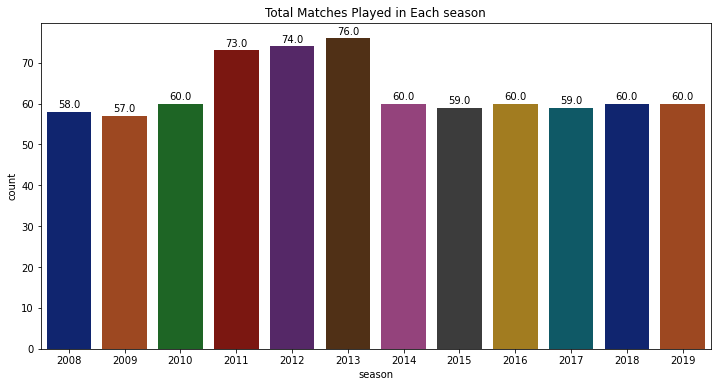

In [30]:
# Total Matches played each season
plt.subplots(figsize=(12,6))
ax=sns.countplot(x='season',data=data,palette='dark')
plt.title('Total Matches Played in Each season')

# Code to display the above values
for p in ax.patches:
    ax.annotate('{:.1f}'.format(p.get_height()),(p.get_x()+0.2,p.get_height()+1))
plt.show()

#### Most No. of Matches were palyed in season 2013 which had around 76 matches being played.

#### Most Wins by a Team

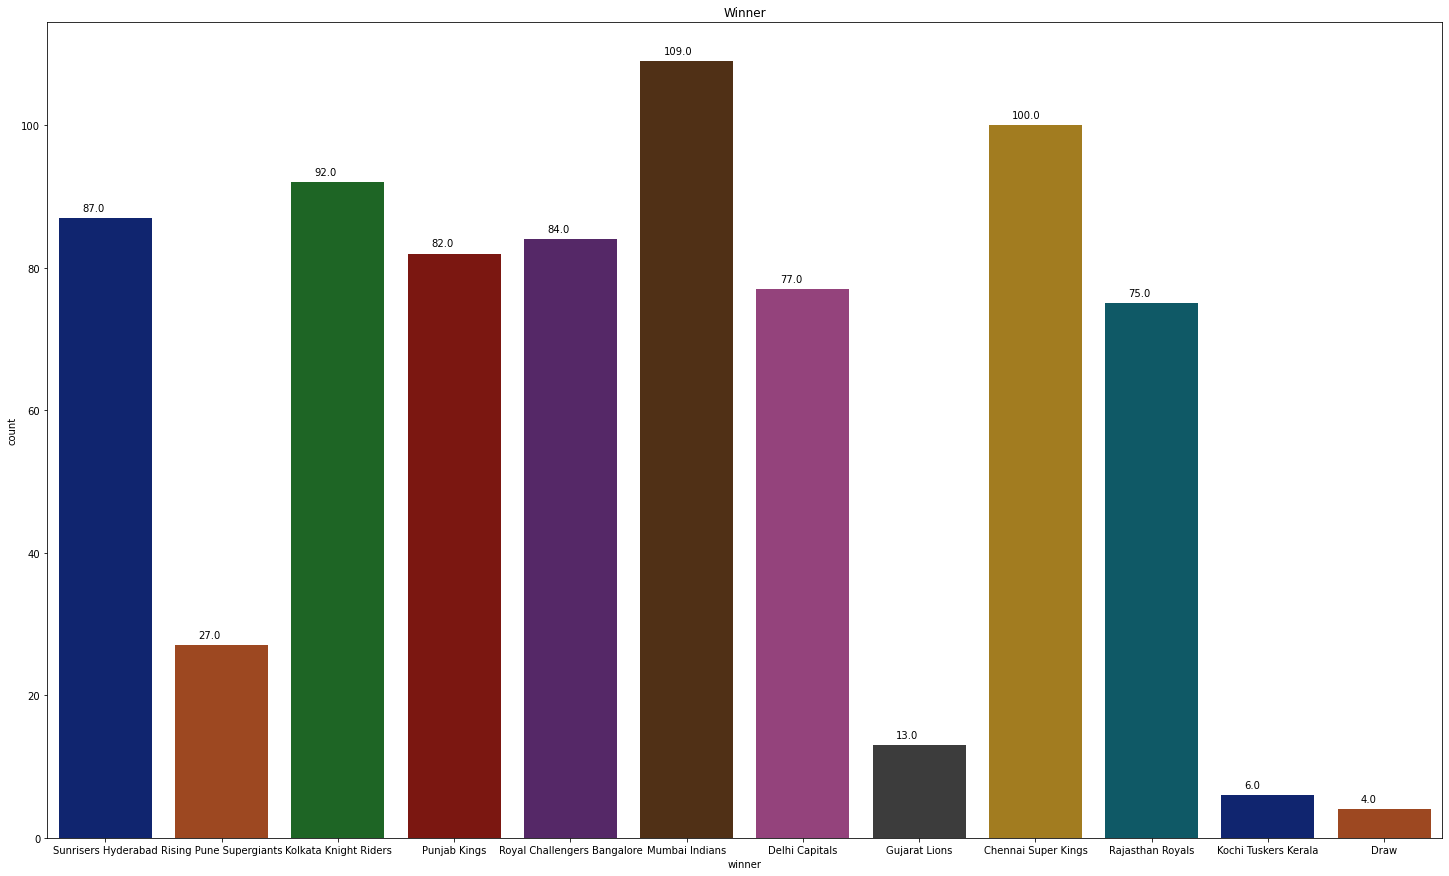

In [31]:
# Most wins by a Team
plt.subplots(figsize=(25,15))
ax=sns.countplot(x='winner',data=data,palette='dark')
plt.title('Winner')

# Code to display the above values
for p in ax.patches:
    ax.annotate('{:.1f}'.format(p.get_height()),(p.get_x()+0.2,p.get_height()+1))
plt.show()

In [32]:
# Maximum Times Match winner
data['winner'].value_counts()

Mumbai Indians                 109
Chennai Super Kings            100
Kolkata Knight Riders           92
Sunrisers Hyderabad             87
Royal Challengers Bangalore     84
Punjab Kings                    82
Delhi Capitals                  77
Rajasthan Royals                75
Rising Pune Supergiants         27
Gujarat Lions                   13
Kochi Tuskers Kerala             6
Draw                             4
Name: winner, dtype: int64

#### Mumbai Indians is the most successfull team as they have won around 109 matches across all seasons followed by Chennai Super Kings 100.

In [33]:
# Maximum Times Player of Match
pom=data['player_of_match'].value_counts()[:10]
pom

CH Gayle          21
AB de Villiers    20
MS Dhoni          17
RG Sharma         17
DA Warner         17
YK Pathan         16
SR Watson         15
SK Raina          14
G Gambhir         13
MEK Hussey        12
Name: player_of_match, dtype: int64

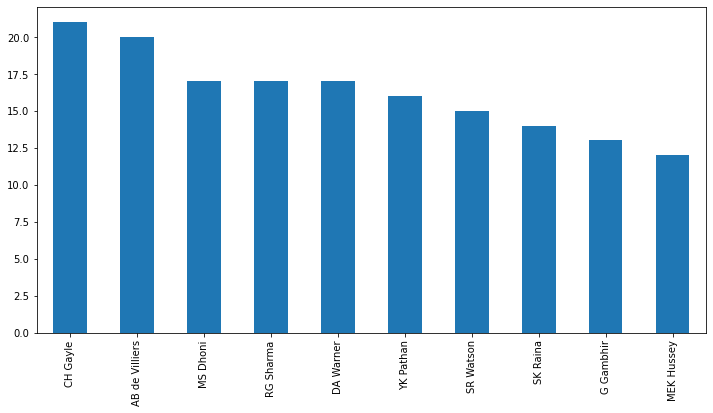

In [34]:
# This gives me the top 10 Player of the Match maximum no. of times.
plt.figure(figsize=(12,6))
pom.plot.bar()
plt.xticks(rotation=90)
plt.show()

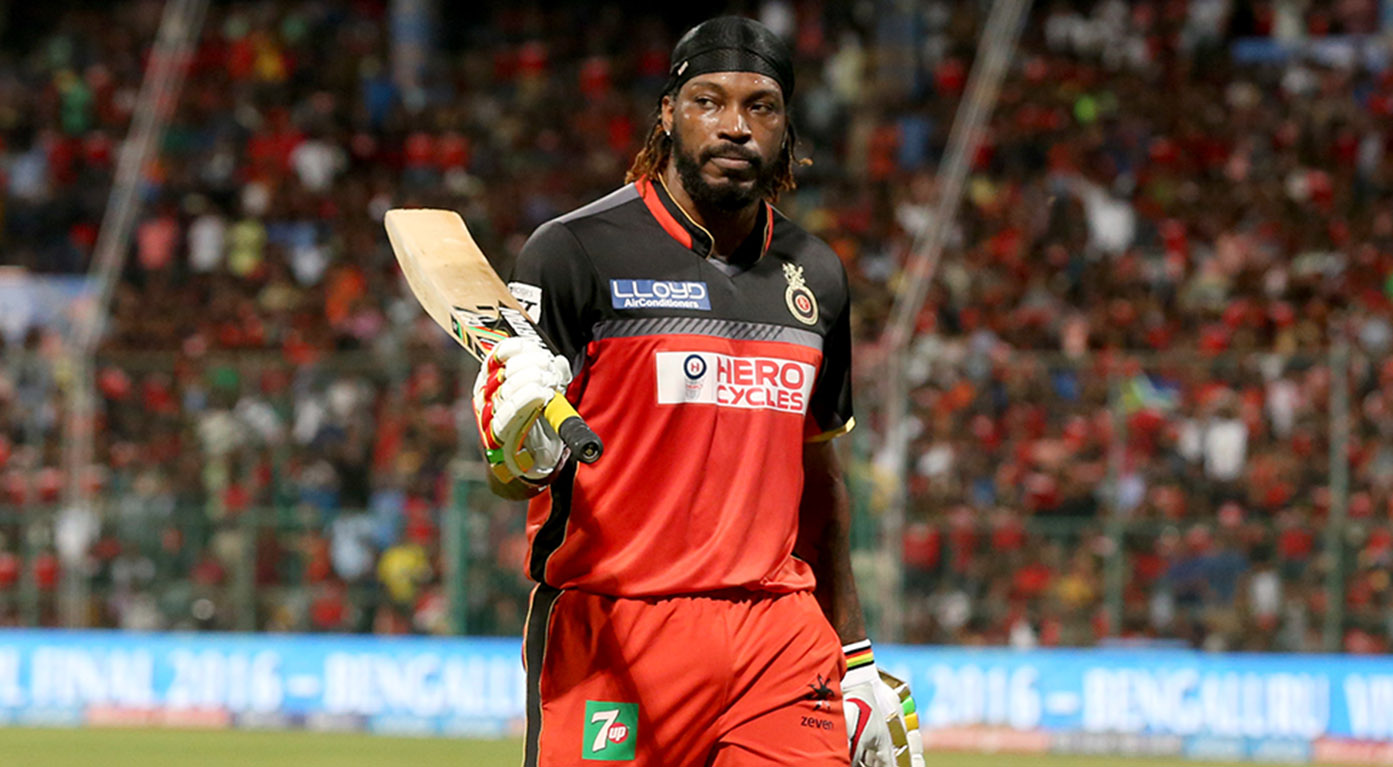

In [35]:
from IPython.display import Image
Image("desktop/CH Galye.jpeg",width=550,height=300)

#### CH Gayle has been the most successful when it comes to being the Player of the Match. He has received the award with 21 times.

In [36]:
# Combining Similar City

data.replace('Bengaluru','Bangalore',inplace=True)

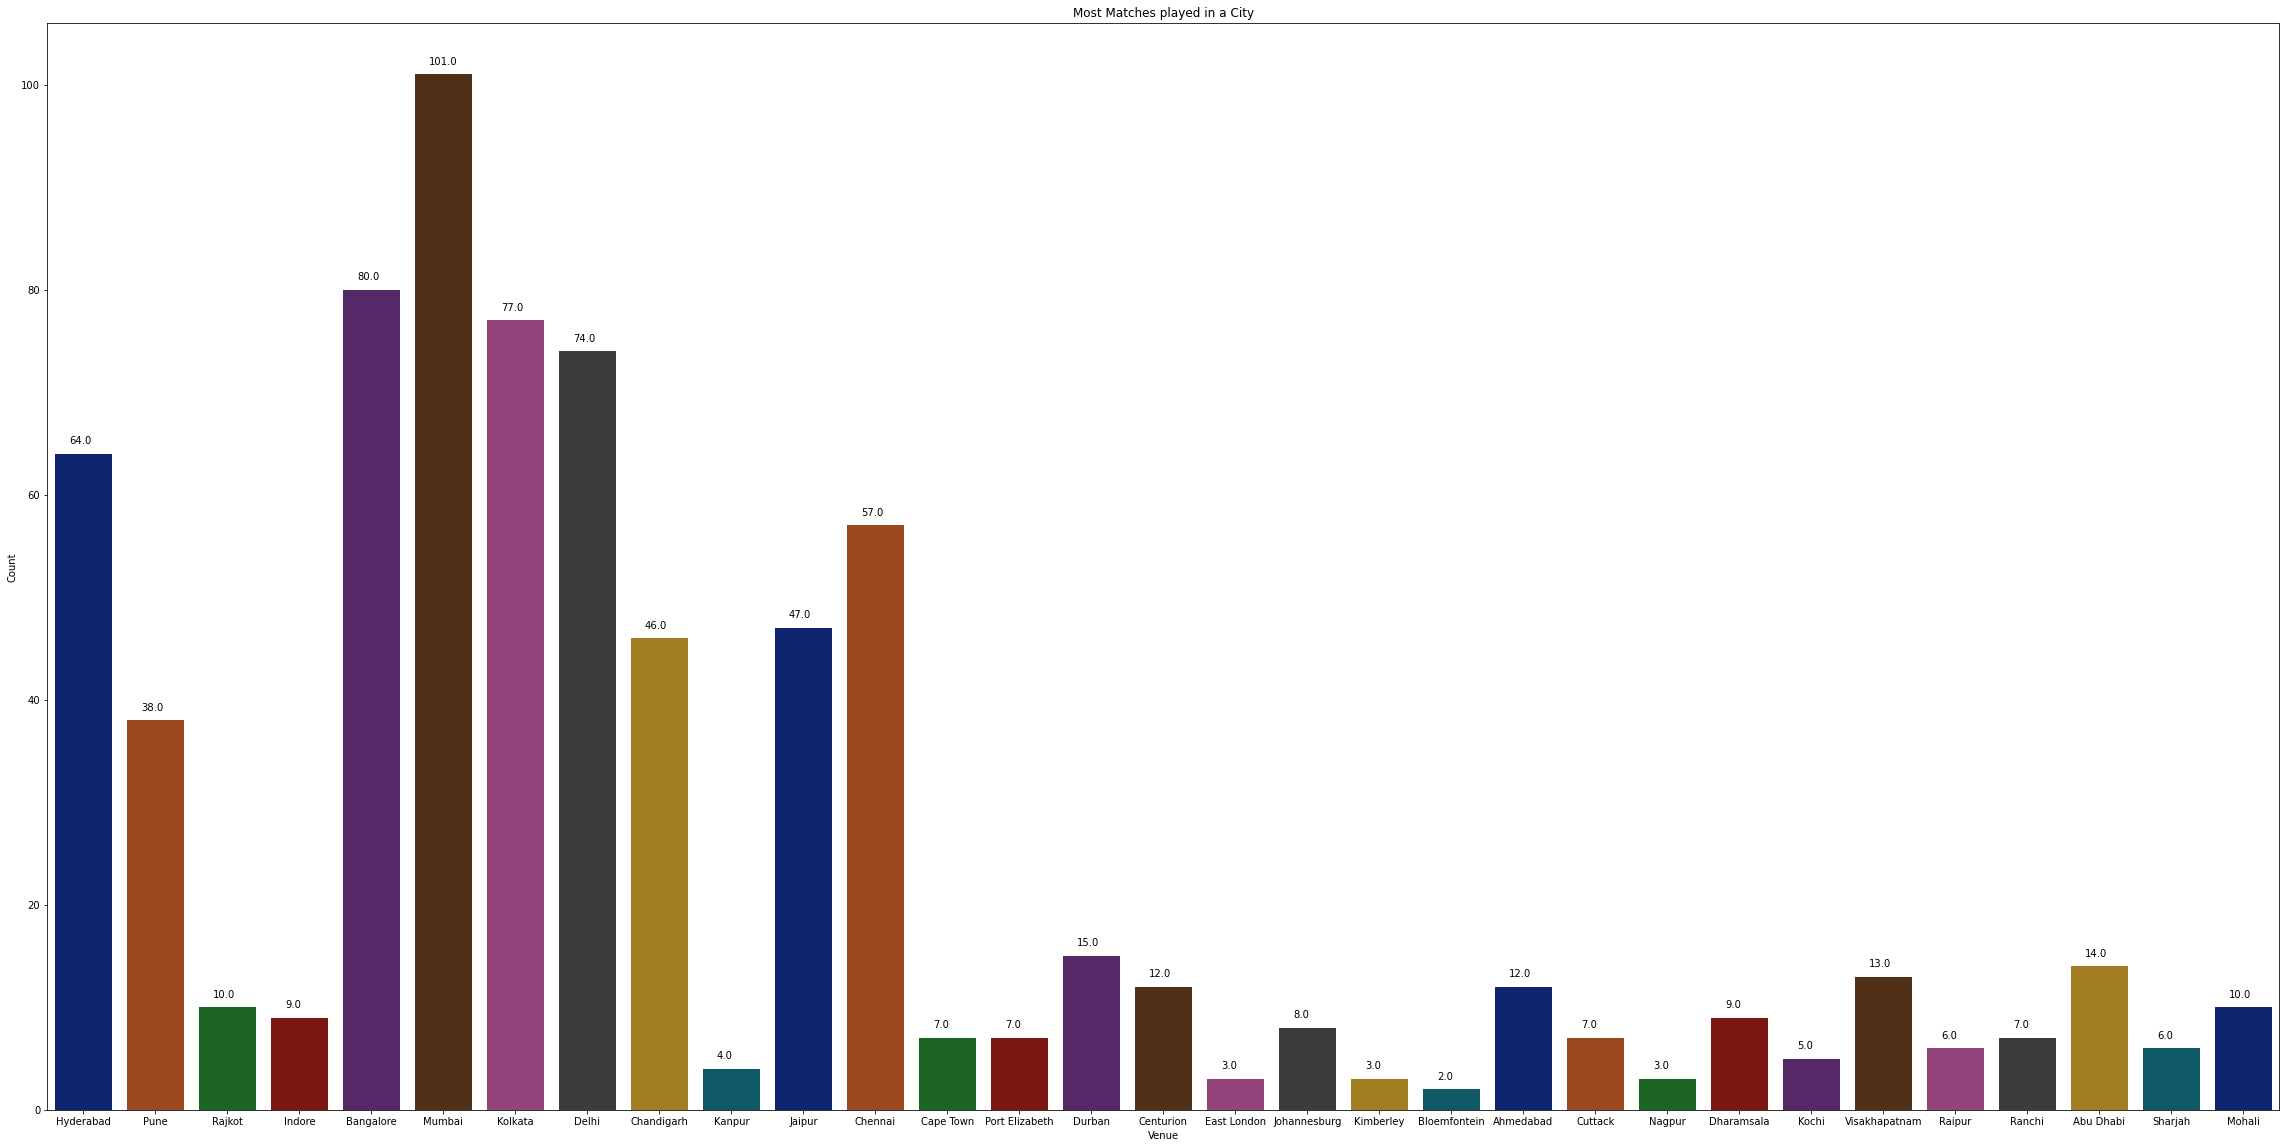

In [37]:
# Most matches played at a venue
plt.subplots(figsize=(40,20))
ax=sns.countplot(x='city',data=data,palette='dark')
plt.title('Most Matches played in a City')
plt.ylabel('Count')
plt.xlabel('Venue')

# Code to display the above values
for p in ax.patches:
    ax.annotate('{:.1f}'.format(p.get_height()),(p.get_x()+0.2,p.get_height()+1))
plt.show()

#### In Mumbai most No. of IPL matches have been played which is around 101.

In [38]:
# Maximum Toss Winner
data['toss_winner'].value_counts()

Mumbai Indians                 98
Kolkata Knight Riders          92
Delhi Capitals                 90
Chennai Super Kings            89
Sunrisers Hyderabad            89
Royal Challengers Bangalore    81
Punjab Kings                   81
Rajasthan Royals               80
Rising Pune Supergiants        33
Gujarat Lions                  15
Kochi Tuskers Kerala            8
Name: toss_winner, dtype: int64

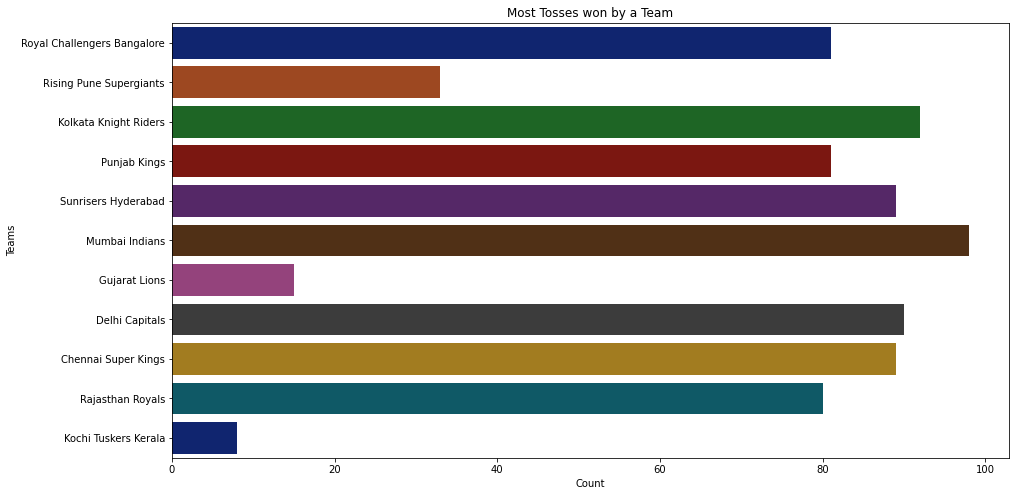

In [39]:
# Max Toss Wins by a Team
plt.subplots(figsize=(15,8))
ay=sns.countplot(y='toss_winner',data=data,palette='dark')
plt.title('Most Tosses won by a Team')
plt.ylabel('Teams')
plt.xlabel('Count')
plt.show()

#### Mumbai Indians have won the Toss maximum No. of times-98.

In [40]:
# Combining Similar Entries

data.replace('M. Chinnaswamy Stadium','M Chinnaswamy Stadium',inplace=True)

In [41]:
# Count of Matches at a Venue
data['venue'].value_counts().head()

M Chinnaswamy Stadium                        80
Eden Gardens                                 77
Wankhede Stadium                             73
Feroz Shah Kotla                             67
Rajiv Gandhi International Stadium, Uppal    56
Name: venue, dtype: int64

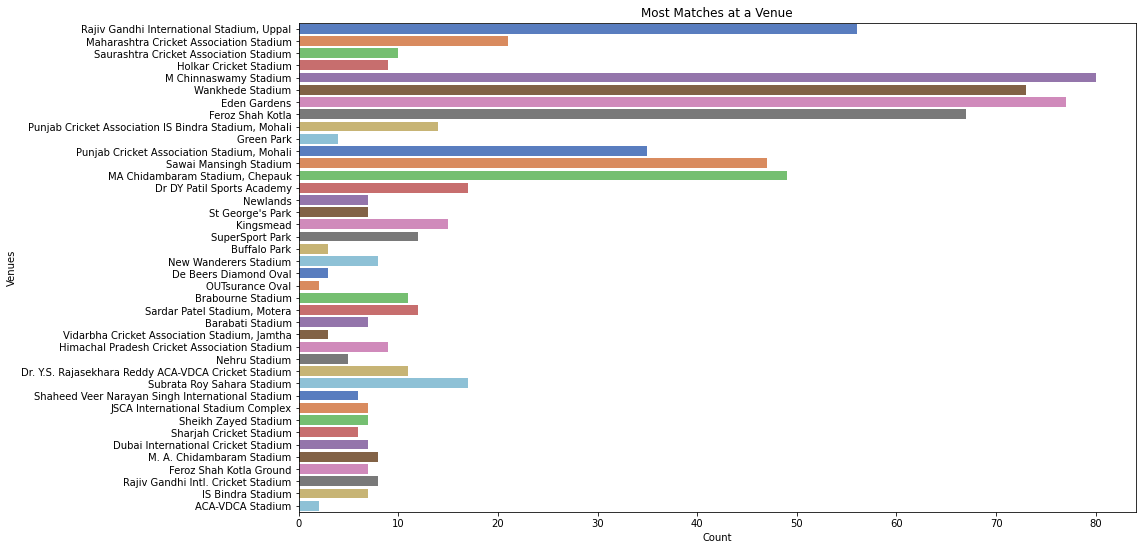

In [42]:
# Most Matches at a Venue
plt.subplots(figsize=(15,9))
ax=sns.countplot(y='venue',data=data,palette='muted')
plt.title('Most Matches at a Venue')
plt.ylabel('Venues')
plt.xlabel('Count')
plt.show()

#### Chinnaswamy Stadium has mosted of the IPL matches-80 followed by Eden Gradens-77 each.

In [43]:
# Duckworth Lewis Matches count
data['dl_applied'].value_counts()

0    737
1     19
Name: dl_applied, dtype: int64

#### So, there are 19 matches were Duckworth Lewis method is taken into consideration.

In [44]:
# List of Matches where we had DL Method used
dl=data[(data['dl_applied']==1)]
dl.head()

id  season       city        date                  team1  \
56    57    2017  Bangalore  2017-05-17    Sunrisers Hyderabad   
99   100    2008      Delhi  2008-05-17         Delhi Capitals   
102  103    2008    Kolkata  2008-05-18  Kolkata Knight Riders   
119  120    2009  Cape Town  2009-04-19           Punjab Kings   
122  123    2009     Durban  2009-04-21           Punjab Kings   

                     team2            toss_winner toss_decision  result  \
56   Kolkata Knight Riders  Kolkata Knight Riders         field  normal   
99            Punjab Kings         Delhi Capitals           bat  normal   
102    Chennai Super Kings  Kolkata Knight Riders           bat  normal   
119         Delhi Capitals         Delhi Capitals         field  normal   
122  Kolkata Knight Riders  Kolkata Knight Riders         field  normal   

     dl_applied                 winner  win_by_runs  win_by_wickets  \
56            1  Kolkata Knight Riders            0               7   
99            1           Punjab Kings            6               0   
102           1    Chennai Super Kings            3               0   
119           1         Delhi Capitals            0              10   
122           1  Kolkata Knight Riders           11               0   

      player_of_match                  venue         umpire1      umpire2  \
56    NM Coulter-Nile  M Chinnaswamy Stadium    AK Chaudhary  Nitin Menon   
99   DPMD Jayawardene       Feroz Shah Kotla  AV Jayaprakash  RE Koertzen   
102           M Ntini           Eden Gardens       Asad Rauf  K Hariharan   
119        DL Vettori               Newlands       MR Benson    SD Ranade   
122          CH Gayle              Kingsmead       DJ Harper    SD Ranade   

         umpire3  
56   Nitin Menon  
99   Nitin Menon  
102  Nitin Menon  
119  Nitin Menon  
122  Nitin Menon

#### Teams Winning Runs Margin 

In [45]:
batting_first=data[data['win_by_runs']!=0]
batting_first.head()

id  season       city        date                        team1  \
0    1    2017  Hyderabad  2017-04-05          Sunrisers Hyderabad   
4    5    2017  Bangalore  2017-04-08  Royal Challengers Bangalore   
8    9    2017       Pune  2017-04-11               Delhi Capitals   
13  14    2017    Kolkata  2017-04-15        Kolkata Knight Riders   
14  15    2017      Delhi  2017-04-15               Delhi Capitals   

                          team2                  toss_winner toss_decision  \
0   Royal Challengers Bangalore  Royal Challengers Bangalore         field   
4                Delhi Capitals  Royal Challengers Bangalore           bat   
8       Rising Pune Supergiants      Rising Pune Supergiants         field   
13          Sunrisers Hyderabad          Sunrisers Hyderabad         field   
14                 Punjab Kings               Delhi Capitals           bat   

    result  dl_applied                       winner  win_by_runs  \
0   normal           0          Sunrisers Hyderabad           35   
4   normal           0  Royal Challengers Bangalore           15   
8   normal           0               Delhi Capitals           97   
13  normal           0        Kolkata Knight Riders           17   
14  normal           0               Delhi Capitals           51   

    win_by_wickets player_of_match                                      venue  \
0                0    Yuvraj Singh  Rajiv Gandhi International Stadium, Uppal   
4                0       KM Jadhav                      M Chinnaswamy Stadium   
8                0       SV Samson    Maharashtra Cricket Association Stadium   
13               0      RV Uthappa                               Eden Gardens   
14               0     CJ Anderson                           Feroz Shah Kotla   

            umpire1      umpire2      umpire3  
0       AY Dandekar     NJ Llong  Nitin Menon  
4   HDPK Dharmasena       S Ravi  Nitin Menon  
8       AY Dandekar       S Ravi  Nitin Menon  
13      AY Dandekar     NJ Llong  Nitin Menon  
14         YC Barde  Nitin Menon  Nitin Menon

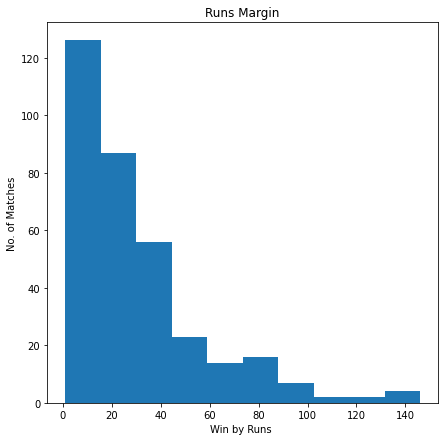

In [46]:
#. Barplot-To understand the Distribution of a Numerical Column
plt.figure(figsize=(7,7))
plt.hist(batting_first['win_by_runs'])
plt.xlabel("Win by Runs ")
plt.title("Runs Margin")
plt.ylabel("No. of Matches")
plt.show()

#### There are around 120+ matches where teams have won within 1-18 runs.

#### Teams which wins most of the games Batting first

In [47]:
# Teams which win most by Batting first

batting_first['winner'].value_counts()

Mumbai Indians                 57
Chennai Super Kings            52
Sunrisers Hyderabad            48
Punjab Kings                   38
Kolkata Knight Riders          36
Royal Challengers Bangalore    35
Delhi Capitals                 28
Rajasthan Royals               27
Rising Pune Supergiants        13
Kochi Tuskers Kerala            2
Gujarat Lions                   1
Name: winner, dtype: int64

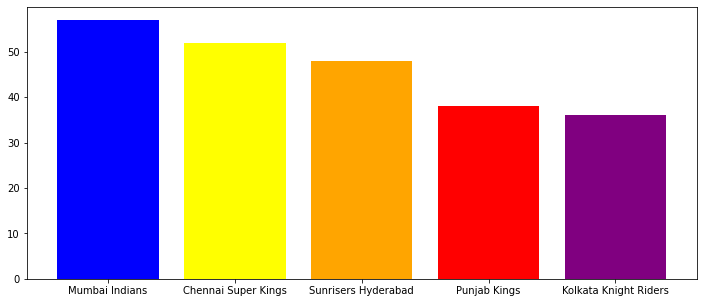

In [48]:
# Barplot
# Now here I have given the keys part which will give the Categorical names

plt.figure(figsize=(12,5))
plt.bar(list(batting_first['winner'].value_counts()[0:5].keys()),list(batting_first['winner'].value_counts()[0:5]),color=['blue','yellow','orange','red','purple']) 
plt.show()

#### Pie Chart Analysis-Batting First

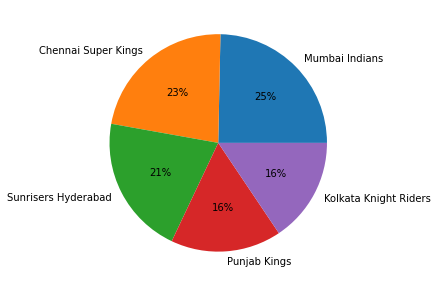

In [49]:
# In the Pie chart
# 1. We give the Numerical entries
# 2. We give the Categorical entries.

plt.figure(figsize=(12,5))
plt.pie(list(batting_first['winner'].value_counts()[0:5]),labels=list(batting_first['winner'].value_counts()[0:5].keys()),autopct='%1.0f%%') 
plt.show()


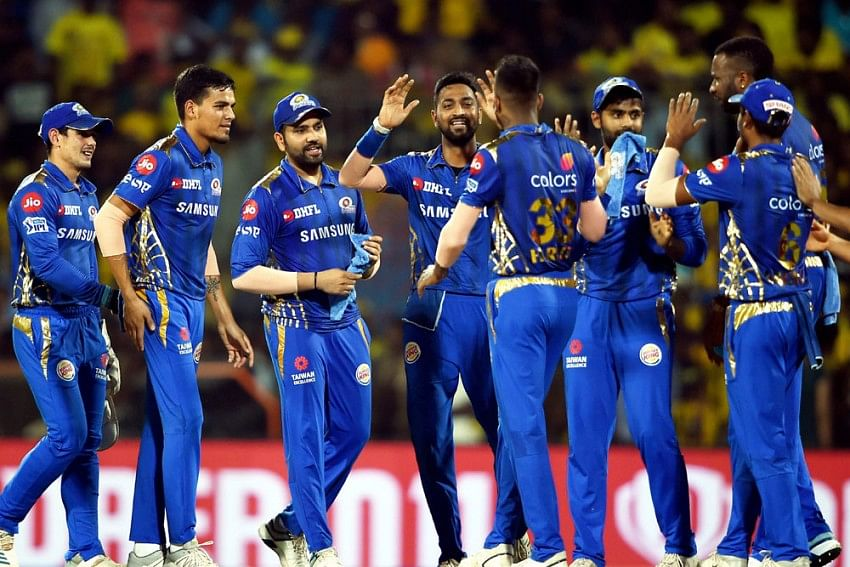

In [50]:
from IPython.display import Image
Image("desktop/Mumbai-Indians.jpeg",width=550,height=300)

#### Mumbai Indians have won most no. of matches(57) when they have batted 1st in their innings.

#### Batting 2nd Analysis

In [51]:
# Batting 2nd -Win by Wickets

batting_2nd=data[data['win_by_wickets']!=0]
batting_2nd.head()

id  season       city        date                    team1  \
1   2    2017       Pune  2017-04-06           Mumbai Indians   
2   3    2017     Rajkot  2017-04-07            Gujarat Lions   
3   4    2017     Indore  2017-04-08  Rising Pune Supergiants   
5   6    2017  Hyderabad  2017-04-09            Gujarat Lions   
6   7    2017     Mumbai  2017-04-09    Kolkata Knight Riders   

                     team2              toss_winner toss_decision  result  \
1  Rising Pune Supergiants  Rising Pune Supergiants         field  normal   
2    Kolkata Knight Riders    Kolkata Knight Riders         field  normal   
3             Punjab Kings             Punjab Kings         field  normal   
5      Sunrisers Hyderabad      Sunrisers Hyderabad         field  normal   
6           Mumbai Indians           Mumbai Indians         field  normal   

   dl_applied                   winner  win_by_runs  win_by_wickets  \
1           0  Rising Pune Supergiants            0               7   
2           0    Kolkata Knight Riders            0              10   
3           0             Punjab Kings            0               6   
5           0      Sunrisers Hyderabad            0               9   
6           0           Mumbai Indians            0               4   

  player_of_match                                      venue         umpire1  \
1       SPD Smith    Maharashtra Cricket Association Stadium  A Nand Kishore   
2         CA Lynn     Saurashtra Cricket Association Stadium     Nitin Menon   
3      GJ Maxwell                     Holkar Cricket Stadium    AK Chaudhary   
5     Rashid Khan  Rajiv Gandhi International Stadium, Uppal      A Deshmukh   
6          N Rana                           Wankhede Stadium     Nitin Menon   

         umpire2      umpire3  
1         S Ravi  Nitin Menon  
2      CK Nandan  Nitin Menon  
3  C Shamshuddin  Nitin Menon  
5       NJ Llong  Nitin Menon  
6      CK Nandan  Nitin Menon

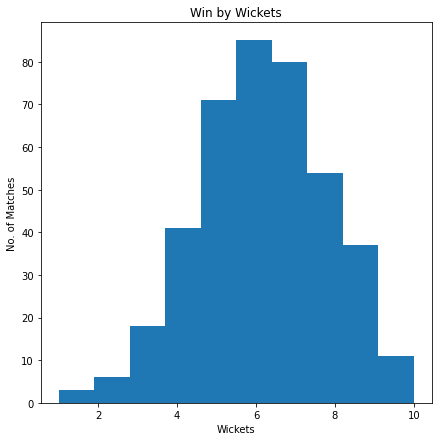

In [52]:
# Histogram

plt.figure(figsize=(7,7))
plt.hist(batting_2nd['win_by_wickets'])
plt.xlabel("Wickets")
plt.ylabel("No. of Matches")
plt.title("Win by Wickets")
plt.show()

#### Here we see that in 80+ matches teams have won the match by 5-6 wickets remaining.

#### Team winning most matches by batting 2nd

In [53]:
batting_2nd['winner'].value_counts()

Kolkata Knight Riders          56
Mumbai Indians                 50
Royal Challengers Bangalore    48
Chennai Super Kings            48
Delhi Capitals                 48
Rajasthan Royals               46
Punjab Kings                   42
Sunrisers Hyderabad            38
Rising Pune Supergiants        14
Gujarat Lions                  12
Kochi Tuskers Kerala            4
Name: winner, dtype: int64

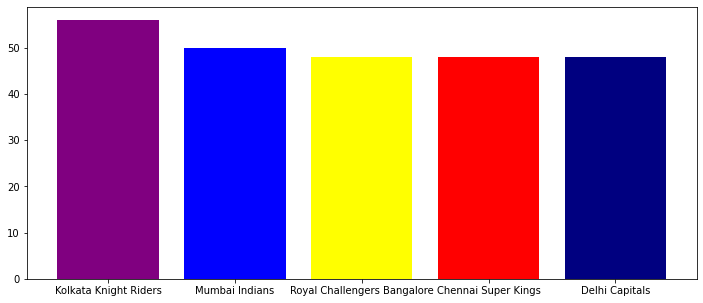

In [54]:
# Bar plot
plt.figure(figsize=(12,5))
plt.bar(list(batting_2nd['winner'].value_counts()[0:5].keys()),list(batting_2nd['winner'].value_counts()[0:5]),color=['purple','blue','yellow','red','navy'])
plt.show()

#### Kolkata has been the best team when it has come to chasing targets. They have won around 56 Matches.

#### Pie Chart Analysis-Batting 2nd 

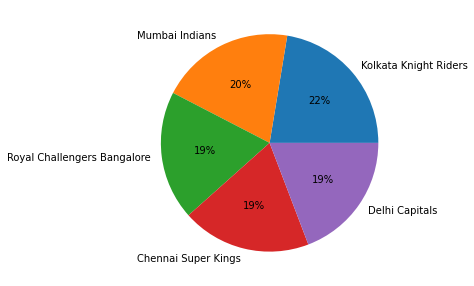

In [55]:
# In the Pie chart
# 1. We give the Numerical entries
# 2. We give the Categorical entries.

plt.figure(figsize=(12,5))
plt.pie(list(batting_2nd['winner'].value_counts()[0:5]),labels=list(batting_2nd['winner'].value_counts()[0:5].keys()),autopct='%1.0f%%') 
plt.show()

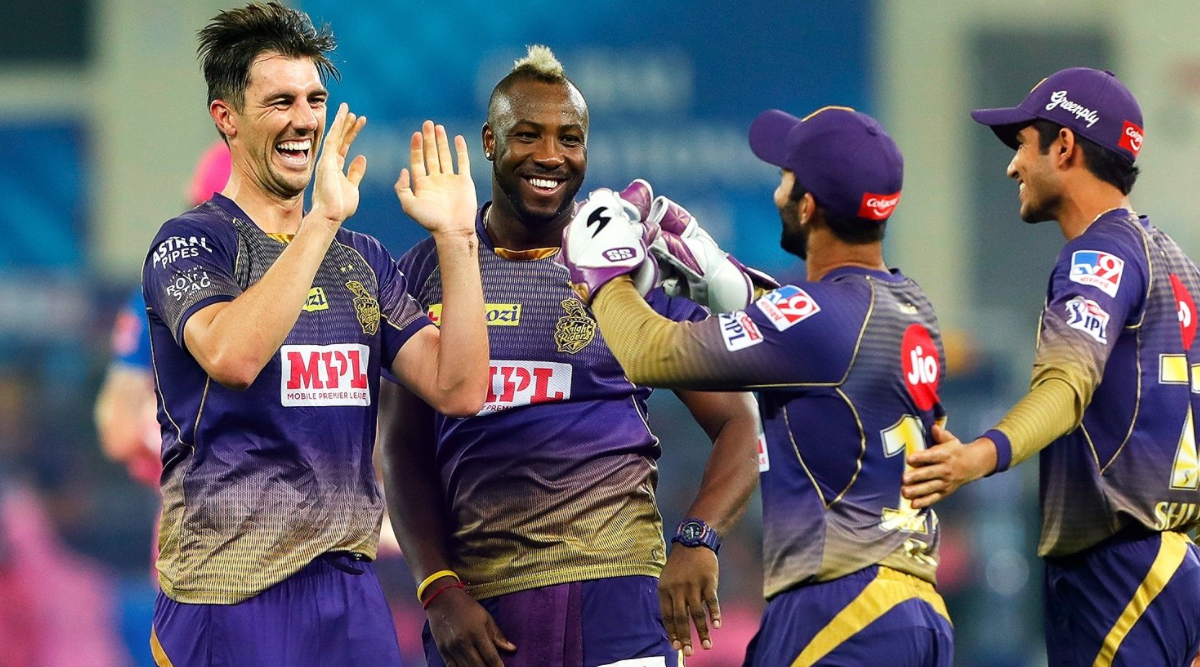

In [56]:
from IPython.display import Image
Image("desktop/KKR.png",width=550,height=300)

### Result of Match

In [57]:
round(data['result'].value_counts(normalize=True)*100,2)

normal       98.28
tie           1.19
no result     0.53
Name: result, dtype: float64

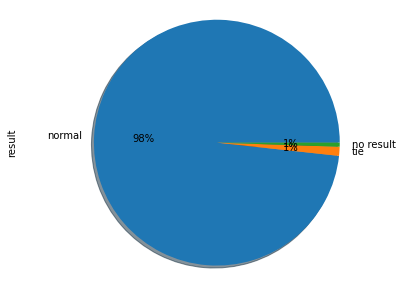

In [58]:
plt.figure(figsize=(7,5))
round(data['result'].value_counts(normalize=True)*100,2).plot.pie(autopct='%1.0f%%',shadow=True)
plt.axis('equal')
plt.show()

#### Toss Decisions

In [59]:
data['toss_decision'].value_counts()

field    463
bat      293
Name: toss_decision, dtype: int64

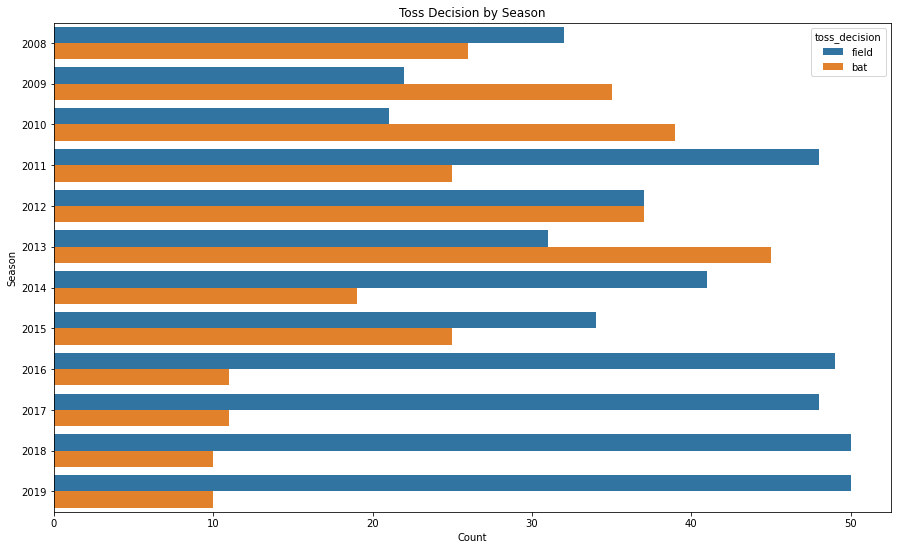

In [60]:
# Toss Decisions Across Seasons
plt.subplots(figsize=(15,9))#,palette='muted'
ax=sns.countplot(y='season',data=data,hue='toss_decision')
plt.title('Toss Decision by Season')
plt.ylabel('Season')
plt.xlabel('Count')
plt.show()

### 2nd Dataset-Deliveries

In [61]:
data2=pd.read_csv("/Users/jasdeepmonga/Library/Containers/com.microsoft.Excel/Data/Downloads/Indian Premier League/deliveries.csv")
data2.head()

match_id  inning         batting_team                 bowling_team  over  \
0         1       1  Sunrisers Hyderabad  Royal Challengers Bangalore     1   
1         1       1  Sunrisers Hyderabad  Royal Challengers Bangalore     1   
2         1       1  Sunrisers Hyderabad  Royal Challengers Bangalore     1   
3         1       1  Sunrisers Hyderabad  Royal Challengers Bangalore     1   
4         1       1  Sunrisers Hyderabad  Royal Challengers Bangalore     1   

   ball    batsman non_striker    bowler  is_super_over  ...  bye_runs  \
0     1  DA Warner    S Dhawan  TS Mills              0  ...         0   
1     2  DA Warner    S Dhawan  TS Mills              0  ...         0   
2     3  DA Warner    S Dhawan  TS Mills              0  ...         0   
3     4  DA Warner    S Dhawan  TS Mills              0  ...         0   
4     5  DA Warner    S Dhawan  TS Mills              0  ...         0   

   legbye_runs  noball_runs  penalty_runs  batsman_runs  extra_runs  \
0            0            0             0             0           0   
1            0            0             0             0           0   
2            0            0             0             4           0   
3            0            0             0             0           0   
4            0            0             0             0           2   

   total_runs  player_dismissed dismissal_kind fielder  
0           0               NaN            NaN     NaN  
1           0               NaN            NaN     NaN  
2           4               NaN            NaN     NaN  
3           0               NaN            NaN     NaN  
4           2               NaN            NaN     NaN  

[5 rows x 21 columns]

In [62]:
data2.duplicated().sum()

23

In [63]:
data2.drop_duplicates(inplace=True)

In [64]:
# Information about the Dataset
data2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 179055 entries, 0 to 179077
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   match_id          179055 non-null  int64 
 1   inning            179055 non-null  int64 
 2   batting_team      179055 non-null  object
 3   bowling_team      179055 non-null  object
 4   over              179055 non-null  int64 
 5   ball              179055 non-null  int64 
 6   batsman           179055 non-null  object
 7   non_striker       179055 non-null  object
 8   bowler            179055 non-null  object
 9   is_super_over     179055 non-null  int64 
 10  wide_runs         179055 non-null  int64 
 11  bye_runs          179055 non-null  int64 
 12  legbye_runs       179055 non-null  int64 
 13  noball_runs       179055 non-null  int64 
 14  penalty_runs      179055 non-null  int64 
 15  batsman_runs      179055 non-null  int64 
 16  extra_runs        179055 non-null  int

In [65]:
# Null value check in each column
data2.isnull().sum()

match_id                 0
inning                   0
batting_team             0
bowling_team             0
over                     0
ball                     0
batsman                  0
non_striker              0
bowler                   0
is_super_over            0
wide_runs                0
bye_runs                 0
legbye_runs              0
noball_runs              0
penalty_runs             0
batsman_runs             0
extra_runs               0
total_runs               0
player_dismissed    170221
dismissal_kind      170221
fielder             172607
dtype: int64

In [66]:
# Values present in Dismissal_kind
data2['dismissal_kind'].value_counts()      

caught                   5348
bowled                   1581
run out                   852
lbw                       540
stumped                   278
caught and bowled         211
retired hurt               12
hit wicket                 10
obstructing the field       2
Name: dismissal_kind, dtype: int64

In [67]:
# Filling Null Values for Dismissal Kind
data2['dismissal_kind'].fillna('caught',inplace=True)

In [68]:
data2.isnull().sum()

match_id                 0
inning                   0
batting_team             0
bowling_team             0
over                     0
ball                     0
batsman                  0
non_striker              0
bowler                   0
is_super_over            0
wide_runs                0
bye_runs                 0
legbye_runs              0
noball_runs              0
penalty_runs             0
batsman_runs             0
extra_runs               0
total_runs               0
player_dismissed    170221
dismissal_kind           0
fielder             172607
dtype: int64

In [69]:
data2.drop(['player_dismissed','fielder'],axis=1 ,inplace=True)

In [70]:
# Checking for Duplicate Team Names and replacing them with new one.
data2['batting_team'].value_counts()

Mumbai Indians                 22615
Kings XI Punjab                20929
Royal Challengers Bangalore    20905
Kolkata Knight Riders          20852
Chennai Super Kings            19761
Delhi Daredevils               18786
Rajasthan Royals               17287
Sunrisers Hyderabad            12907
Deccan Chargers                 9034
Pune Warriors                   5443
Gujarat Lions                   3566
Delhi Capitals                  1908
Rising Pune Supergiant          1900
Kochi Tuskers Kerala            1582
Rising Pune Supergiants         1580
Name: batting_team, dtype: int64

In [71]:
# From dataset2 also we need to sum up similar values

In [72]:
data2.replace("Delhi Daredevils","Delhi Capitals",inplace=True)
data2.replace("Deccan Chargers","Sunrisers Hyderabad",inplace=True)
data2.replace("Pune Wariors","Rising Pune Supergiants",inplace=True)
data2.replace("Rising Pune Supergiant","Rising Pune Supergiants",inplace=True)
data2.replace("Kings XI Punjab","Punjab Kings",inplace=True)

#### Team Batting the Most no. of Overs

In [73]:
overs_batted=data2.groupby(['batting_team']).sum()
overs_batted['total_balls']=data2['batting_team'].value_counts()
overs_batted['overs']=(overs_batted['total_balls']//6)
overs_batted[overs_batted['overs']>200].sort_values(by='overs',ascending=0)['overs'].head(5).reset_index()

batting_team  overs
0               Mumbai Indians   3769
1          Sunrisers Hyderabad   3656
2                 Punjab Kings   3488
3  Royal Challengers Bangalore   3484
4        Kolkata Knight Riders   3475

#### Mumbai Indians have batted the most No. of overs in the IPL history.

#### Team Bowling the Maximum No. of overs

In [74]:
overs_bowled=data2.groupby(['bowling_team']).sum()
overs_bowled['total_balls']=data2['bowling_team'].value_counts()
overs_bowled['overs']=(overs_bowled['total_balls']//6)
overs_bowled[overs_bowled['overs']>200].sort_values(by='overs',ascending=0)['overs'].head(5).reset_index()

bowling_team  overs
0               Mumbai Indians   3752
1          Sunrisers Hyderabad   3636
2  Royal Challengers Bangalore   3538
3        Kolkata Knight Riders   3489
4                 Punjab Kings   3463

#### Mumbai Indians have bowled the most no. of overs.

#### Players bowling the Maximum No. of Overs

In [75]:
max_overs=data2.groupby(['bowler']).sum()
max_overs['total_balls']=data2['bowler'].value_counts()
max_overs['overs']=(max_overs['total_balls']//6)
max_overs[max_overs['overs']>200].sort_values(by='overs',ascending=0)['overs'].head(5).reset_index()

bowler  overs
0  Harbhajan Singh    575
1         A Mishra    528
2        PP Chawla    526
3         R Ashwin    502
4       SL Malinga    495

In [76]:
max_overs.reset_index()

bowler  match_id  inning   over  ball  is_super_over  wide_runs  \
0    A Ashish Reddy    109528     442   3805   962              0          8   
1        A Chandila     92700     348   1314   819              0          0   
2       A Choudhary      3146     164   1002   402              0          6   
3       A Dananjaya    197550      50    225    91              0          1   
4        A Flintoff      8028      84    846   231              0          0   
..              ...       ...     ...    ...   ...            ...        ...   
400      YA Abdulla     31818     337   2307   820              0         12   
401       YK Pathan    448325    1681  10667  4273              0         43   
402       YS Chahal   6469807    2774  19257  6618              0         60   
403    Yuvraj Singh    379750    1316  10519  3134              0         12   
404          Z Khan    668455    3312  18966  8217              0         89   

     bye_runs  legbye_runs  noball_runs  penalty_runs  batsman_runs  \
0           2            2            2             0           386   
1           0            3            0             0           242   
2           0            0            1             0           137   
3           0            0            0             0            47   
4           1            0            0             0           105   
..        ...          ...          ...           ...           ...   
400         1            3            1             0           294   
401         1           27            0             0          1372   
402        26           24            6             0          2300   
403         6            8            1             0          1065   
404        14           64            2             0          2691   

     extra_runs  total_runs  total_balls  overs  
0            14         400          270     45  
1             3         245          234     39  
2             7         144          108     18  
3             1          48           25      4  
4             1         106           66     11  
..          ...         ...          ...    ...  
400          17         311          222     37  
401          71        1443         1184    197  
402         116        2416         1840    306  
403          27        1092          882    147  
404         169        2860         2276    379  

[405 rows x 16 columns]

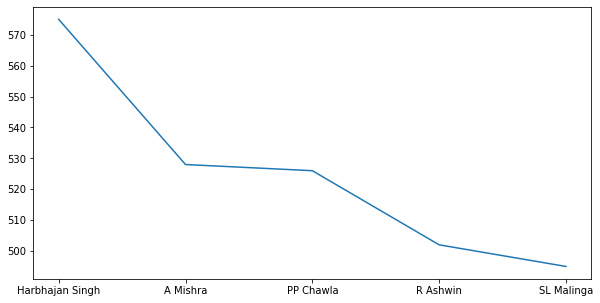

In [77]:
plt.figure(figsize=(10,5))
plt.plot(max_overs['overs'].sort_values(ascending=False)[0:5])
plt.show()

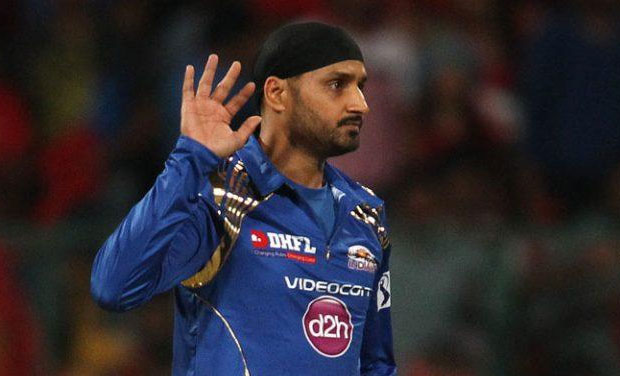

In [78]:
from IPython.display import Image
Image("desktop/HS.jpeg",width=550,height=300)

In [79]:
# Maximum Runs scored by a batsmen-Orange Cap
max_runs=data2.groupby(['batsman'])['batsman_runs'].agg('sum').sort_values(ascending=False).reset_index()
max_runs.head()

batsman  batsman_runs
0    V Kohli          5434
1   SK Raina          5415
2  RG Sharma          4914
3  DA Warner          4741
4   S Dhawan          4631

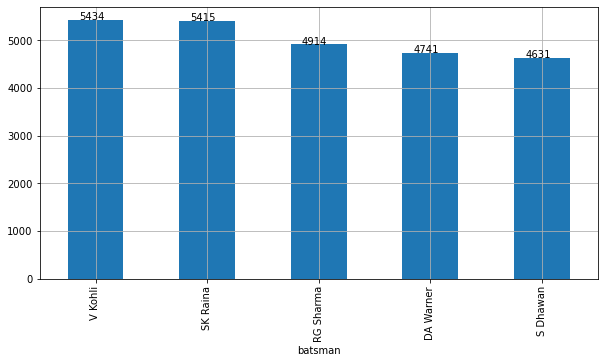

In [80]:
# Visulaisation
plt.figure(figsize=(10,5))
max_runs=data2.groupby(['batsman'])['batsman_runs'].sum()
ax=max_runs.sort_values(ascending=False)[:5].plot.bar()

# To display the count
for p in ax.patches:
    ax.annotate(format(p.get_height()), (p.get_x()+0.1, p.get_height()+1))
plt.grid()
plt.show()

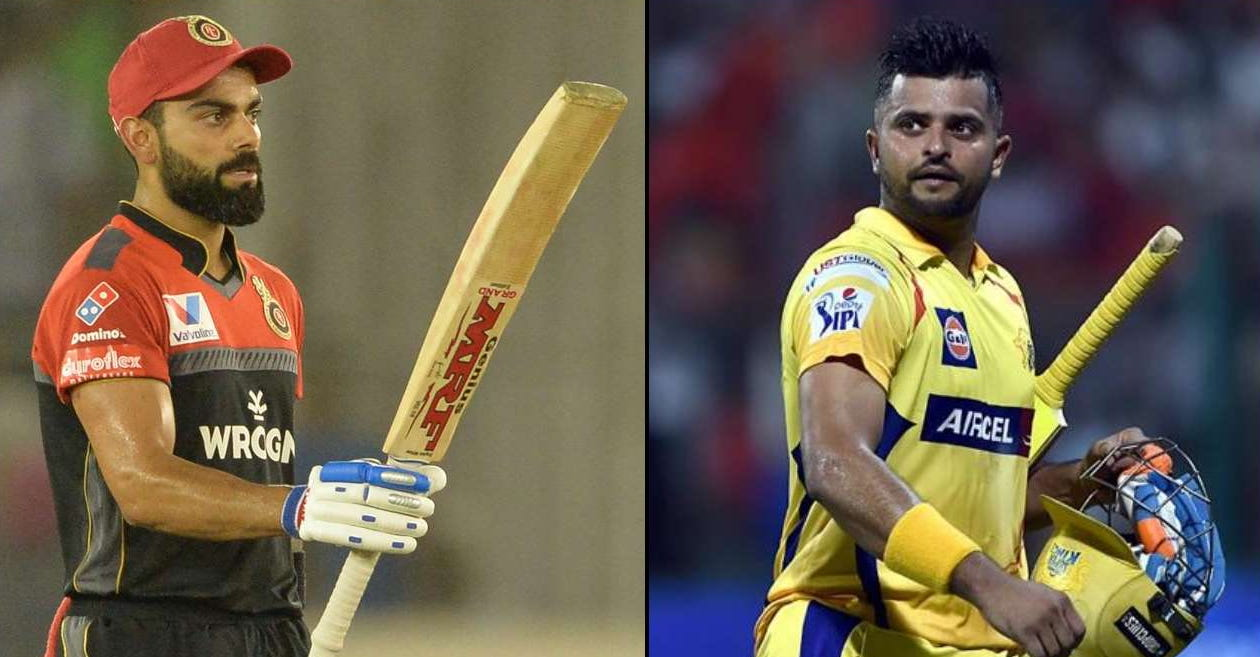

In [81]:
from IPython.display import Image
Image("desktop/Virat-Kohli and Suresh-Raina.jpeg",width=550,height=300)

#### Virat Kohli has scored the Most No. runs (5434) from season 2018-2019.

In [82]:
# Extra Runs Count
data2['extra_runs'].value_counts()

0    169519
1      8494
2       407
4       348
5       219
3        67
7         1
Name: extra_runs, dtype: int64

In [83]:
# Most Extras
# Taking Extras greater than 0 as that will be the runs conceded on those deliveries.
extras=data2.groupby(['bowler','bowling_team'])['extra_runs'].agg(lambda x:(x>0).sum()).reset_index().sort_values(by='extra_runs',ascending=False)
extras.head()

bowler         bowling_team  extra_runs
588       SL Malinga       Mumbai Indians         221
90           B Kumar  Sunrisers Hyderabad         121
156         DJ Bravo  Chennai Super Kings         119
214  Harbhajan Singh       Mumbai Indians         116
601        SR Watson     Rajasthan Royals         116

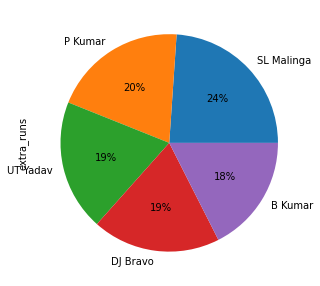

In [84]:
plt.figure(figsize=(12,5))
extras=data2.groupby(['bowler'])['extra_runs'].agg(lambda x:(x>0).sum())
ax=extras.sort_values(ascending=False)[:5].plot.pie(autopct='%1.0f%%')
plt.show()

#### SL Malinga has given the most No. of runs in extra around 221.

In [85]:
# Types of Values in Dismissal
data2['dismissal_kind'].value_counts()

caught                   175569
bowled                     1581
run out                     852
lbw                         540
stumped                     278
caught and bowled           211
retired hurt                 12
hit wicket                   10
obstructing the field         2
Name: dismissal_kind, dtype: int64

In [86]:
# Dismissals which count as bowlers wicket
# So, here I have excluded the ones which don't count
dismissal=data2[(data2['dismissal_kind']!='runout') & (data2['dismissal_kind']!='retired hurt') & (data2['dismissal_kind']!='obstructing the field')]
dismissal.head()

match_id  inning         batting_team                 bowling_team  over  \
0         1       1  Sunrisers Hyderabad  Royal Challengers Bangalore     1   
1         1       1  Sunrisers Hyderabad  Royal Challengers Bangalore     1   
2         1       1  Sunrisers Hyderabad  Royal Challengers Bangalore     1   
3         1       1  Sunrisers Hyderabad  Royal Challengers Bangalore     1   
4         1       1  Sunrisers Hyderabad  Royal Challengers Bangalore     1   

   ball    batsman non_striker    bowler  is_super_over  wide_runs  bye_runs  \
0     1  DA Warner    S Dhawan  TS Mills              0          0         0   
1     2  DA Warner    S Dhawan  TS Mills              0          0         0   
2     3  DA Warner    S Dhawan  TS Mills              0          0         0   
3     4  DA Warner    S Dhawan  TS Mills              0          0         0   
4     5  DA Warner    S Dhawan  TS Mills              0          2         0   

   legbye_runs  noball_runs  penalty_runs  batsman_runs  extra_runs  \
0            0            0             0             0           0   
1            0            0             0             0           0   
2            0            0             0             4           0   
3            0            0             0             0           0   
4            0            0             0             0           2   

   total_runs dismissal_kind  
0           0         caught  
1           0         caught  
2           4         caught  
3           0         caught  
4           2         caught

In [87]:
#Most Wickets-Purple Cap

wickets=dismissal.groupby(['bowler','bowling_team'])['dismissal_kind'].count().reset_index().sort_values(by='dismissal_kind',ascending=False)
wickets.head(5)

bowler           bowling_team  dismissal_kind
214  Harbhajan Singh         Mumbai Indians            2989
588       SL Malinga         Mumbai Indians            2974
597        SP Narine  Kolkata Knight Riders            2600
466         R Ashwin    Chennai Super Kings            2081
90           B Kumar    Sunrisers Hyderabad            2041

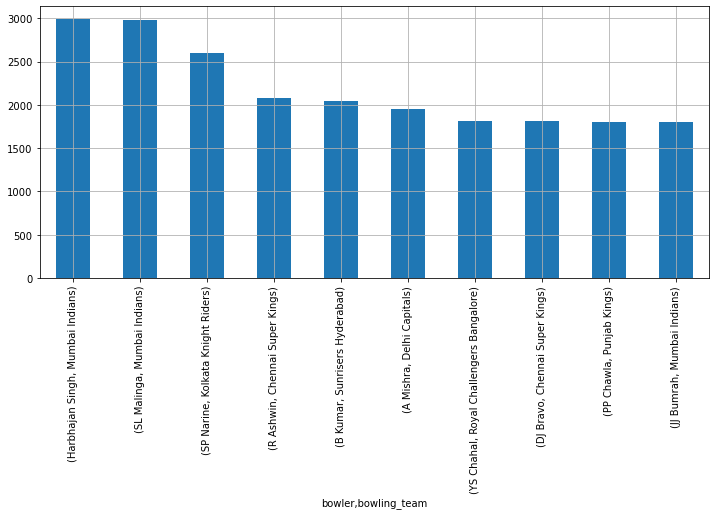

In [88]:
plt.figure(figsize=(12,5))
wickets=data2.groupby(['bowler','bowling_team'])['dismissal_kind'].count()
ax=wickets.sort_values(ascending=False)[:10].plot.bar()
plt.grid()
#plt.xticks(rotation=180)
plt.show()

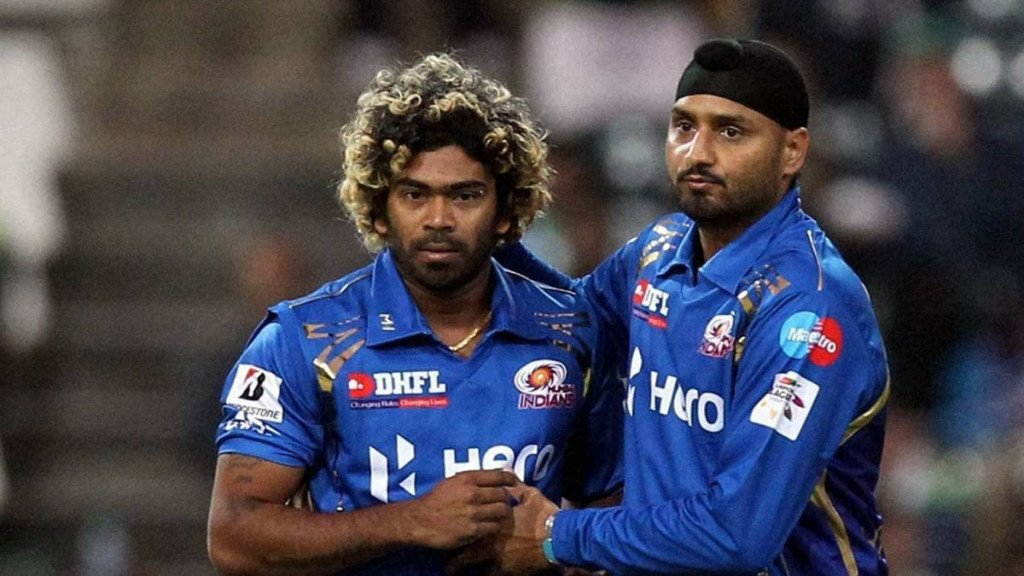

In [89]:
from IPython.display import Image
Image("desktop/harbhajan-singh-malinga-mi-ipl.jpeg",width=550,height=300)

#### Leading Wicket Takers:

1. Harbhajan Singh-Mumbai Indians

2. SL Malinga-Mumbai Indians

3. SP Narine-KKR


#### Best Economy Rate

In [90]:
best_economy=data2.groupby(['bowler']).sum()
best_economy['total_balls']=data2['bowler'].value_counts()
best_economy['overs']=(best_economy['total_balls']//6)
best_economy['economy_rate']=(best_economy['total_runs']//best_economy['overs'])
best_economy[best_economy['overs']>=200].head().sort_values(by='economy_rate',ascending=True).reset_index()

bowler  match_id  inning   over   ball  is_super_over  wide_runs  \
0  A Mishra   5428006    4908  36354  11346              0         57   
1   A Nehra    640241    2942  17190   7137              0         64   
2  AB Dinda    505007    2273  14072   5814              0         72   
3  AR Patel   5264123    2612  18925   6216              0         37   
4   B Kumar   7260315    4117  24959   9788              0        110   

   bye_runs  legbye_runs  noball_runs  penalty_runs  batsman_runs  extra_runs  \
0         6           40           20             0          3727         123   
1         2           40            9             0          2422         115   
2         8           22           14             0          1987         116   
3         9           35            0             0          2102          81   
4         6           73            8             0          3067         197   

   total_runs  total_balls  overs  economy_rate  
0        3850         3172    528           7.0  
1        2537         1974    329           7.0  
2        2103         1589    264           7.0  
3        2183         1745    290           7.0  
4        3264         2707    451           7.0

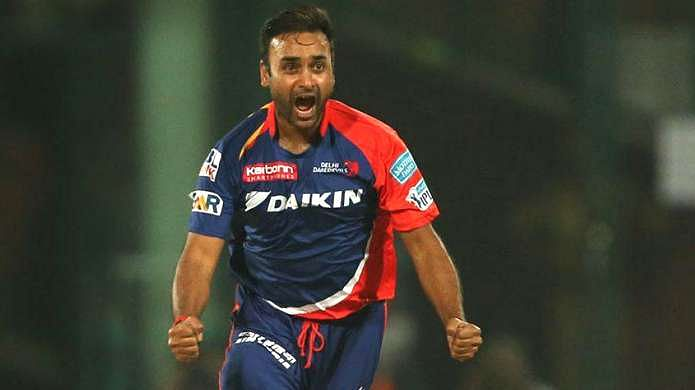

In [91]:
from IPython.display import Image
Image("desktop/amitmishra_delhidaredevils_ipl2016_large-1464624704-800.jpeg",width=550,height=300)

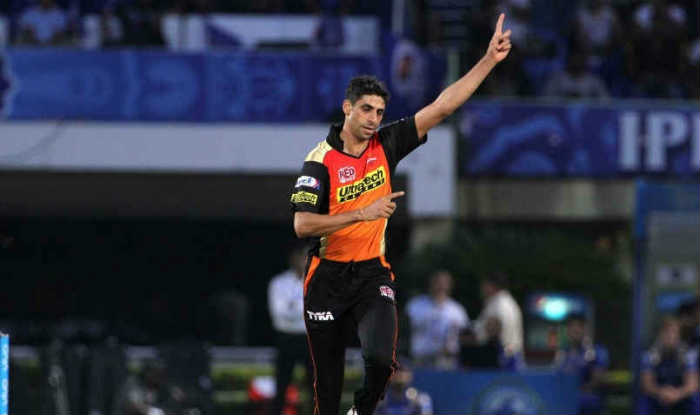

In [92]:
from IPython.display import Image
Image("desktop/ashish-nehra-srh.jpeg",width=550,height=300)

#### Best Economy Rate as per Minimum Overs 200

1. A. Mishra

2. A Nehra

3. AB Dinda

4. AR Patel

5. B Kumar

#### Strike Rate 

In [93]:
balls_faced=data2.groupby(['batsman'])['ball'].count().reset_index().sort_values(by='ball',ascending=False)
balls_faced.head()

batsman  ball
486    V Kohli  4211
428   SK Raina  4044
367  RG Sharma  3816
392   S Dhawan  3775
147  G Gambhir  3524

In [94]:
max_runs.head()

batsman
A Ashish Reddy    280
A Chandila          4
A Chopra           53
A Choudhary        25
A Dananjaya         4
Name: batsman_runs, dtype: int64

In [95]:
SR_data=pd.merge(balls_faced,max_runs,how='inner',on='batsman')
SR_data.head()

batsman  ball  batsman_runs
0    V Kohli  4211          5434
1   SK Raina  4044          5415
2  RG Sharma  3816          4914
3   S Dhawan  3775          4631
4  G Gambhir  3524          4223

In [96]:
#data2['strike_rate']=round((data2['batsman_runs']//data2['ball'])*100,2)
SR_data['Strike_Rate']=round((SR_data['batsman_runs']/SR_data['ball'])*100,2).sort_values(ascending=False)

In [97]:
SR_data.head().sort_values(by='Strike_Rate',ascending=False)

batsman  ball  batsman_runs  Strike_Rate
1   SK Raina  4044          5415       133.90
0    V Kohli  4211          5434       129.04
2  RG Sharma  3816          4914       128.77
3   S Dhawan  3775          4631       122.68
4  G Gambhir  3524          4223       119.84

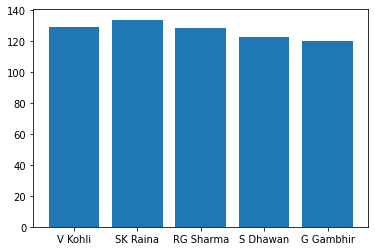

In [98]:
plt.bar(SR_data['batsman'][0:5],SR_data['Strike_Rate'][0:5])
plt.show()

#### Players with Highest Strike Rate

1. V. Kohli

2. SK Raina

3. RG Sharma

4. S Dhawan

5. G Gambhir



### Suggestions:

As a sports analyst I would suggest to focus on below mentioned teams and players for product endoresements:


1. Teams which have won most No. of Macthes are __Mumbai Indians(109)__ and __Chennai Super Kings(100)__.


2. __CH Gayle__-__21 Player of the Match Awards__.


3. __Batting First__- __Mumbai Indians have won-57 Matches__


4. __Batting 2nd__- __KKR have won 56 Matches.__


5. Mumbai Indians have batted and also bowled the Most Number of Overs in the IPL history.


6. __VK Kohli__ is the __leading run Scorer__ in the IPL with __5434 runs.__


7. __Suresh Raina__ is the __2nd highest run Scorer__ in the IPL with __5415 runs.__


8. __Harbhajan Singh is the leading wicket taker with 2989 wickets followed by LS Malings 2974 wickets__.


9. __A. Mishra seems to have the best economy rate (min. 200 overs) of 7 from season 2008 to 2019__.


10. __VK Kohli has the best strike in the IPL 133.90.__